In [1]:
import cirq

### The circuit

In [2]:
a, b = cirq.LineQubit.range(2)

qc = cirq.Circuit(
    cirq.H.on(a),
    cirq.CNOT.on(a, b)
)

print(qc)

0: ───H───@───
          │
1: ───────X───


In [3]:
from mitiq.zne.scaling import fold_global
"""We are folding the circuit with scale factor 5"""
# Fold the circuit
folded = fold_global(qc, scale_factor=5.)

In [4]:
import numpy as np
from cirq import Circuit, depolarize, DensityMatrixSimulator

SIMULATOR = DensityMatrixSimulator()

def noiseless(circ: Circuit) -> float:
    """Executes a circuit with no noise and
   returns the expectation value of the obs ZZ."""
    rho = SIMULATOR.simulate(circ).final_density_matrix
    obs = np.diag([1, -1, -1, 1])
    expectation = np.real(np.trace(rho @ obs))
    return expectation

exact = noiseless(qc)
print('Noiseless value without any fold:',exact)

Noiseless value without any fold: 0.9999999403953552


In [9]:
def noisy(circ: Circuit) -> float:
   """Executes a circuit with depolarizing noise and
   returns the expectation value of the obs ZZ."""
   circuit = circ.with_noise(depolarize(p=NOISE))
   rho = SIMULATOR.simulate(circuit).final_density_matrix
   obs = np.diag([1, -1, -1, 1])
   expectation = np.real(np.trace(rho @ obs))
   return expectation

expval = []

abs_error = []

for NOISE in [0.01,0.02,0.05,0.08,0.1,0.15,0.2]:
    expval.append(noisy(folded))
    abs_error.append(abs(exact - expval))

In [7]:
from mitiq.zne.inference import LinearFactory, RichardsonFactory, PolyFactory


In [11]:
from mitiq.zne.zne import execute_with_zne

scale_factors=[1.0,2.0,3.0,4.0,5.0]
error_with_richardson = []
# error_real_result = round(abs(exact - expval),4)

richardson_fac = RichardsonFactory(scale_factors=scale_factors)

for NOISE in [0.01,0.02,0.05,0.08,0.1,0.15,0.2]:
    zne_expval_richard = execute_with_zne(folded, noisy, factory=richardson_fac)
    error_with_richardson.append(round(abs(exact - zne_expval_richard),4))   




In [13]:
import matplotlib.pyplot as plt

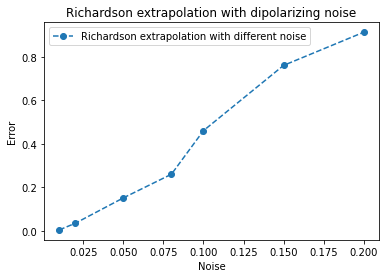

In [14]:

x1 = [0.01,0.02,0.05,0.08,0.1,0.15,0.2]
y1 = error_with_richardson
# plotting the line 1 points
plt.plot(x1, y1, "--o", label = "Richardson extrapolation with different noise")

# naming the x axis
plt.xlabel('Noise')
# naming the y axis
plt.ylabel('Error')
# giving a title to my graph
plt.title('Richardson extrapolation with dipolarizing noise')
 
# show a legend on the plot
plt.legend()
 
# function to show the plot
plt.show()
